## Split Pre-Disaster images into Tiles

In [3]:
import rioxarray as rxr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imsave
import cv2

In [138]:
dataarray = rxr.open_rasterio('InferenceData/CycloneGita/Pre_disaster_segment1.tif')
dataarray

<xarray.DataArray (band: 4, y: 2981, x: 3371)>
[40195804 values with dtype=uint8]
Coordinates:
  * band         (band) int64 1 2 3 4
  * y            (y) float64 -21.13 -21.13 -21.13 ... -21.14 -21.14 -21.14
  * x            (x) float64 -175.2 -175.2 -175.2 ... -175.2 -175.2 -175.2
    spatial_ref  int64 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0
    grid_mapping:  spatial_ref

In [139]:
r = np.array(dataarray[0])
g = np.array(dataarray[1])
b = np.array(dataarray[2])
r.shape

(2981, 3371)

In [140]:
img = np.dstack([r,g,b])
img = cv2.resize(img, dsize=(1650, 1866))
print(img.shape)
# offsetX, offsetY = 60, 50
offsetX, offsetY = 0, 0
# resampleFactor = 5.021083065390276284e-06 / 3.22195757935927854e-06
resampleFactor = 1
size = int(resampleFactor * 256)
sub_img = img[offsetY:offsetY + size, offsetX:offsetX + size]

(1866, 1650, 3)


In [141]:
img_indices = []

for i in range(6):
    for j in range(6):
        index = (offsetY + i * size, offsetY + (i + 1) * size, offsetX + j * size, offsetX + (j + 1) * size)
        img_indices.append(index)
        sub_img = img[index[0]:index[1], index[2]:index[3]]
        imsave(f'InferenceData/CycloneGita/Pre_Disaster_Tiles/img{i}-{j}.png', sub_img)
    
print(img_indices)

[(0, 256, 0, 256), (0, 256, 256, 512), (0, 256, 512, 768), (0, 256, 768, 1024), (0, 256, 1024, 1280), (0, 256, 1280, 1536), (256, 512, 0, 256), (256, 512, 256, 512), (256, 512, 512, 768), (256, 512, 768, 1024), (256, 512, 1024, 1280), (256, 512, 1280, 1536), (512, 768, 0, 256), (512, 768, 256, 512), (512, 768, 512, 768), (512, 768, 768, 1024), (512, 768, 1024, 1280), (512, 768, 1280, 1536), (768, 1024, 0, 256), (768, 1024, 256, 512), (768, 1024, 512, 768), (768, 1024, 768, 1024), (768, 1024, 1024, 1280), (768, 1024, 1280, 1536), (1024, 1280, 0, 256), (1024, 1280, 256, 512), (1024, 1280, 512, 768), (1024, 1280, 768, 1024), (1024, 1280, 1024, 1280), (1024, 1280, 1280, 1536), (1280, 1536, 0, 256), (1280, 1536, 256, 512), (1280, 1536, 512, 768), (1280, 1536, 768, 1024), (1280, 1536, 1024, 1280), (1280, 1536, 1280, 1536)]


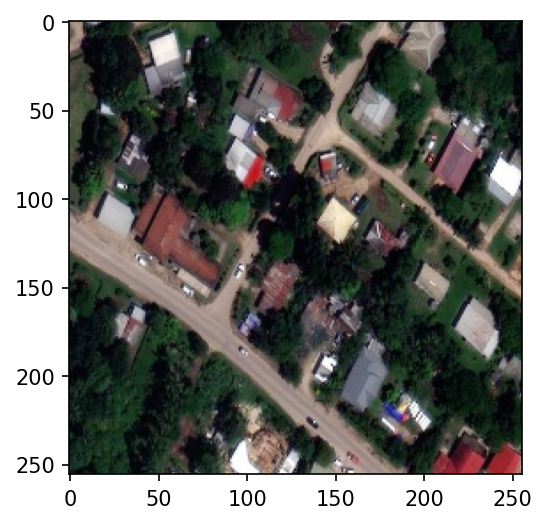

In [142]:
fig, ax = plt.subplots()
fig.set_dpi(150)
ax.imshow(sub_img)

## Split Post-Disaster Images into Tiles

In [143]:
dataarray = rxr.open_rasterio('InferenceData/CycloneGita/Post_disaster_segment1.tif')
dataarray

<xarray.DataArray (band: 4, y: 1650, x: 1866)>
[12315600 values with dtype=uint8]
Coordinates:
  * band         (band) int64 1 2 3 4
  * y            (y) float64 -21.13 -21.13 -21.13 ... -21.14 -21.14 -21.14
  * x            (x) float64 -175.2 -175.2 -175.2 ... -175.2 -175.2 -175.2
    spatial_ref  int64 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0
    grid_mapping:  spatial_ref

In [144]:
r = np.array(dataarray[0])
g = np.array(dataarray[1])
b = np.array(dataarray[2])
r.shape

(1650, 1866)

In [145]:
img = np.dstack([r,g,b])
offsetX, offsetY = 0, 0
resampleFactor = 1
size = int(resampleFactor * 256)
sub_img = img[offsetY:offsetY + size, offsetX:offsetX + size]
print(img.shape)

(1650, 1866, 3)


In [146]:
img_indices = []

for i in range(6):
    for j in range(6):
        index = (offsetY + i * size, offsetY + (i + 1) * size, offsetX + j * size, offsetX + (j + 1) * size)
        img_indices.append(index)
        sub_img = img[index[0]:index[1], index[2]:index[3]]
        imsave(f'InferenceData/CycloneGita/Post_Disaster_Tiles/img{i}-{j}.png', sub_img)
    
print(img_indices)

[(0, 256, 0, 256), (0, 256, 256, 512), (0, 256, 512, 768), (0, 256, 768, 1024), (0, 256, 1024, 1280), (0, 256, 1280, 1536), (256, 512, 0, 256), (256, 512, 256, 512), (256, 512, 512, 768), (256, 512, 768, 1024), (256, 512, 1024, 1280), (256, 512, 1280, 1536), (512, 768, 0, 256), (512, 768, 256, 512), (512, 768, 512, 768), (512, 768, 768, 1024), (512, 768, 1024, 1280), (512, 768, 1280, 1536), (768, 1024, 0, 256), (768, 1024, 256, 512), (768, 1024, 512, 768), (768, 1024, 768, 1024), (768, 1024, 1024, 1280), (768, 1024, 1280, 1536), (1024, 1280, 0, 256), (1024, 1280, 256, 512), (1024, 1280, 512, 768), (1024, 1280, 768, 1024), (1024, 1280, 1024, 1280), (1024, 1280, 1280, 1536), (1280, 1536, 0, 256), (1280, 1536, 256, 512), (1280, 1536, 512, 768), (1280, 1536, 768, 1024), (1280, 1536, 1024, 1280), (1280, 1536, 1280, 1536)]


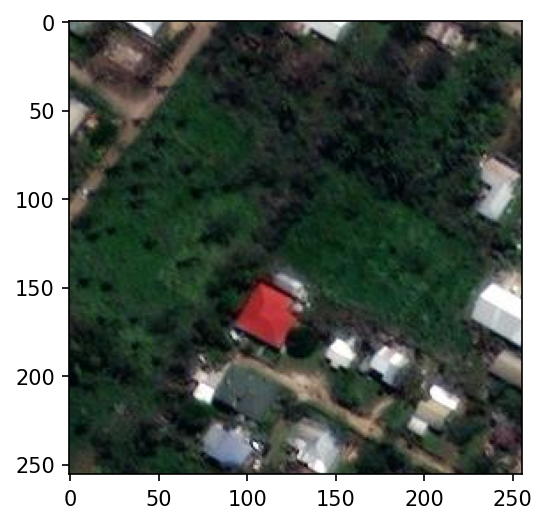

In [147]:
fig, ax = plt.subplots()
fig.set_dpi(150)
ax.imshow(sub_img)

## Visualise the generated tiles

In [4]:
from PIL import Image
import matplotlib.image as im

PRE_TILES_PATH = 'InferenceData/CycloneGita/PreDisasterImages'
POST_TILES_PATH = 'InferenceData/CycloneGita/PostDisasterImages'

i_h, i_w = 256, 256

def preprocess_image(img):
    img = cv2.resize(img, dsize=(i_w, i_h))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img / 255.
    img = img[np.newaxis, ...]
    return img

def VisualizeTiles(i):   
    pre_img = cv2.imread(f'{PRE_TILES_PATH}/Pre_Disaster_Tiles.{i}.tif')
    pre_img = preprocess_image(pre_img)
    post_img = cv2.imread(f'{POST_TILES_PATH}/Post_Disaster_Tiles.{i}.tif')
    post_img = preprocess_image(post_img)
    print(pre_img.shape)

    fig, arr = plt.subplots(1, 2, figsize=(15, 15))
    arr[0].imshow(pre_img[0])
    arr[0].set_title('Pre Disaster Image')
    arr[1].imshow(post_img[0])
    arr[1].set_title('Post Disaster Image ')

(1, 256, 256, 3)


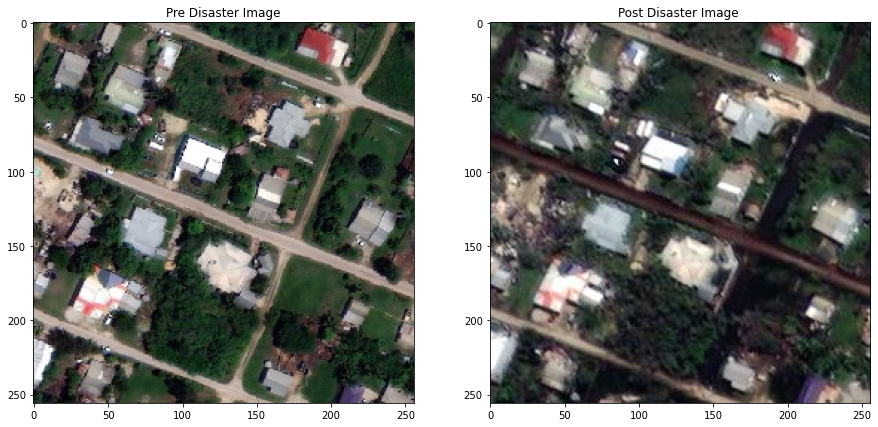

In [5]:
VisualizeTiles(12)

## Define the model and run inference

In [6]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, BatchNormalization, Conv2DTranspose, concatenate, Lambda, Subtract
from tensorflow.keras.losses import binary_crossentropy

In [7]:
def EncoderMiniBlock(inputs, name, order, n_filters=32, dropout_prob=0.3, max_pooling=True):
    conv = Conv2D(n_filters, 3, activation='relu', padding='same', kernel_initializer='HeNormal')(inputs)
    conv = Conv2D(n_filters, 3, activation='relu', padding='same', kernel_initializer='HeNormal')(conv)
    
    conv = BatchNormalization(name=f'{name}_batch_normalization_{order}')(conv, training=False)
    
    if dropout_prob > 0:
        conv = Dropout(dropout_prob)(conv)
        
    if max_pooling:
        next_layer = tf.keras.layers.MaxPooling2D(pool_size = (2,2))(conv)    
    else:
        next_layer = conv
        
    skip_connection = conv
    
    return next_layer, skip_connection

In [8]:
def DecoderMiniBlock(prev_layer_input, skip_layer_input, n_filters=32):
    up = Conv2DTranspose(n_filters, (3, 3), strides=(2,2), padding='same')(prev_layer_input)
    
    merge = concatenate([up, skip_layer_input], axis=3)
    
    conv = Conv2D(n_filters, 3, activation='relu', padding='same', kernel_initializer='HeNormal')(merge)
    conv = Conv2D(n_filters, 3, activation='relu', padding='same', kernel_initializer='HeNormal')(conv)
    return conv

In [9]:
def UNet(inputs, name, n_filters=32, n_classes=3):
    cb1 = EncoderMiniBlock(inputs, name=name, n_filters=n_filters, dropout_prob=0, max_pooling=True, order=0)
    cb2 = EncoderMiniBlock(cb1[0], name=name, n_filters=2 * n_filters, dropout_prob=0, max_pooling=True, order=1)
    cb3 = EncoderMiniBlock(cb2[0], name=name, n_filters=4 * n_filters, dropout_prob=0, max_pooling=True, order=2)
    cb4 = EncoderMiniBlock(cb3[0], name=name, n_filters=8 * n_filters, dropout_prob=0.3, max_pooling=True, order=3)
    cb5 = EncoderMiniBlock(cb4[0], name=name, n_filters=16 * n_filters, dropout_prob=0.3, max_pooling=False, order=4) 
    
    ub6 = DecoderMiniBlock(cb5[0], cb4[1], 8 * n_filters)
    ub7 = DecoderMiniBlock(ub6, cb3[1], 4 * n_filters)
    ub8 = DecoderMiniBlock(ub7, cb2[1], 2 * n_filters)
    ub9 = DecoderMiniBlock(ub8, cb1[1], n_filters)
    
    conv9 = Conv2D(n_filters, 3, activation='relu', padding='same', kernel_initializer='HeNormal')(ub9)
    conv10 = Conv2D(n_classes, 1, padding='same')(conv9)
    
    model = tf.keras.Model(inputs=inputs, outputs=conv10)
    
    return model

In [10]:
def DamageAssessmentBlock(pre_layer_input, post_layer_input, prev_layer_input=None, conv_kernel_size=3, conv_n_filters=16, upconv_n_filters=16, norm=True):
    next_input = Subtract()([pre_layer_input, post_layer_input])
    
    if prev_layer_input != None:
        up = Conv2DTranspose(upconv_n_filters, (3, 3), strides=(2,2), padding='same')(prev_layer_input)
        next_input = concatenate([next_input, up], axis=3)
    
    conv = Conv2D(conv_n_filters, conv_kernel_size, activation='relu', padding='same', kernel_initializer='HeNormal')(next_input)
    if norm:
        conv = BatchNormalization()(conv, training=False)
    
    return conv

In [11]:
class SiamUNetClassifier():
    def __init__(self, input_shape=(256, 256, 3)):        
        self.pre_input = Input(input_shape)
        self.post_input = Input(input_shape)
        
        self.pre_unet = UNet(self.pre_input, 'pre', n_filters=16, n_classes=2)
        self.post_unet = UNet(self.post_input, 'post', n_filters=16, n_classes=2)
        
        self.init_UNET()
        
        # Add the layers to perform damage assessment
        damage_classifier_block0 = DamageAssessmentBlock(
            self.pre_unet.get_layer('pre_batch_normalization_4').output,
            self.post_unet.get_layer('post_batch_normalization_4').output,
            conv_n_filters=256
        )
        
        damage_classifier_block1 = DamageAssessmentBlock(
            self.pre_unet.get_layer('pre_batch_normalization_3').output,
            self.post_unet.get_layer('post_batch_normalization_3').output,
            prev_layer_input=damage_classifier_block0,
            conv_n_filters=256,
            upconv_n_filters=128,
        )
        
        damage_classifier_block2 = DamageAssessmentBlock(
            self.pre_unet.get_layer('pre_batch_normalization_2').output,
            self.post_unet.get_layer('post_batch_normalization_2').output,
            prev_layer_input=damage_classifier_block1,
            conv_n_filters=128,
            upconv_n_filters=64
        )
        
        damage_classifier_block3 = DamageAssessmentBlock(
            self.pre_unet.get_layer('pre_batch_normalization_1').output,
            self.post_unet.get_layer('post_batch_normalization_1').output,
            prev_layer_input=damage_classifier_block2,
            conv_n_filters=64,
            upconv_n_filters=32
        )
        
        output = DamageAssessmentBlock(
            self.pre_unet.get_layer('pre_batch_normalization_0').output,
            self.post_unet.get_layer('post_batch_normalization_0').output,
            prev_layer_input=damage_classifier_block3,
            conv_n_filters=6,
            upconv_n_filters=16,
            conv_kernel_size=1,
            norm=False
        )        
        
        self.model = tf.keras.Model(inputs=[self.pre_input, self.post_input], outputs=output)
        
    def init_UNET(self):
        pre_disaster_weights_path = 'pre_disaster_segmentation-correct-weights-22-epochs.h5'
        post_disaster_weights_path = 'post_disaster_segmentation-correct-weights-10-epochs.h5'
        
        self.pre_unet.load_weights(pre_disaster_weights_path)
        self.post_unet.load_weights(post_disaster_weights_path)
        
        for layer in self.pre_unet.layers:
            layer.trainable = False
            
        for layer in self.post_unet.layers:
            layer.trainable = False

In [12]:
clf = SiamUNetClassifier()

In [13]:
clf.model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 input_2 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 16  448         ['input_1[0][0]']                
                                )                                                           

In [14]:
clf.model.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [15]:
clf.model.load_weights('damage-assesment-weights.h5')

## Run inference using the model

In [208]:
from PIL import Image
import matplotlib.image as im
import cv2
import os

In [200]:
PRE_TILES_PATH = 'InferenceData/CycloneGita/PreDisasterImages'
POST_TILES_PATH = 'InferenceData/CycloneGita/PostDisasterImages'
OUTPUT_PATH = 'InferenceData/CycloneGita/PredictedMasks'

In [201]:
i_h, i_w = 256, 256

def preprocess_image(img):
    img = cv2.resize(img, dsize=(i_w, i_h))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img / 255.
    img = img[np.newaxis, ...]
    return img

In [202]:
id_to_label = {
    1: 'no-damage',
    2: 'minor-damage',
    3: 'major-damage',
    4: 'destroyed',
    5: 'un-classified'
}

In [203]:
overlay_colors = {
    'destroyed': [53, 64, 235],
    'major-damage': [44, 148, 245],
    'minor-damage': [25, 236, 255],
    'no-damage': [25, 255, 117],
    'un-classified': [255, 212, 105]
}

In [204]:
overlay_colors[id_to_label[4]]

[53, 64, 235]

In [205]:
def overlay_image(img, mask):
    '''Returns a cv2 image after overlaying the mask on img'''
    alpha = 0.7
    output = np.copy(img)

    damage_mask = np.copy(img)
    damage_mask[(mask == 5).all(-1)] = overlay_colors[id_to_label[5]]
    damage_mask[(mask == 4).all(-1)] = overlay_colors[id_to_label[4]]
    damage_mask[(mask == 3).all(-1)] = overlay_colors[id_to_label[3]]
    damage_mask[(mask == 2).all(-1)] = overlay_colors[id_to_label[2]]
    damage_mask[(mask == 1).all(-1)] = overlay_colors[id_to_label[1]]

    cv2.addWeighted(damage_mask, alpha, img, 1 - alpha, 0, output)
    return output

In [206]:
def VisualizeTiles(i):   
    pre_img = cv2.imread(f'{PRE_TILES_PATH}/Pre_Disaster_Tiles.{i}.tif')
    pre_img = preprocess_image(pre_img)
    post_img = cv2.imread(f'{POST_TILES_PATH}/Post_Disaster_Tiles.{i}.tif')
    post_img_ori = post_img.copy()
    post_img = preprocess_image(post_img)
    
    pred_y = clf.model.predict((pre_img, post_img))
    pred_mask = tf.argmax(pred_y[0], axis=-1)
    pred_mask = pred_mask[..., tf.newaxis]
    pred_mask = pred_mask.numpy()
    pred_mask = pred_mask.reshape((i_h, i_w))
    pred_mask = np.dstack([pred_mask, pred_mask, pred_mask])
    
    print(pred_mask.shape)
    # print(np.unique(mask, return_counts=True))
    
    print(post_img_ori.shape)
    output = overlay_image(post_img_ori, pred_mask)
    output_rgb = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)

    fig, arr = plt.subplots(1, 3, figsize=(15, 15))
    # arr[0].imshow(pre_img[0])
    # arr[0].set_title('Pre Disaster Image')
    arr[0].imshow(post_img[0])
    arr[0].set_title('Post Disaster Image')
    arr[1].imshow(pred_mask[:,:,0])
    arr[1].set_title('Predicted Mask Image')
    arr[2].imshow(output_rgb)
    arr[2].set_title('Final output image')

(256, 256, 3)
(256, 256, 3)


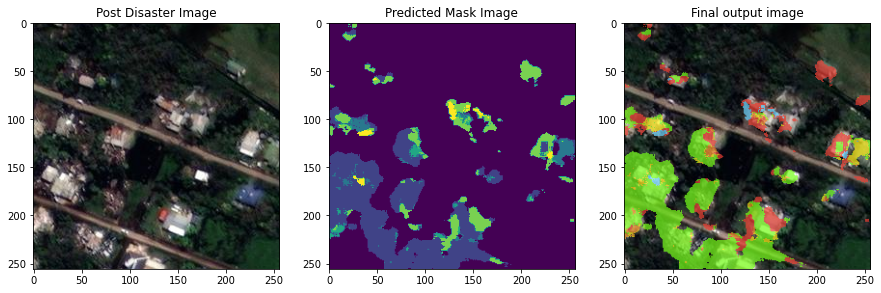

In [191]:
VisualizeTiles(13)

(256, 256, 3)
(256, 256, 3)


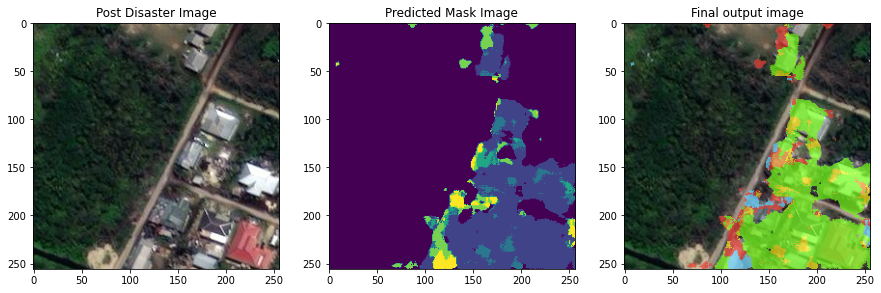

In [198]:
VisualizeTiles(10)

In [222]:
image_ids = os.listdir(PRE_TILES_PATH)
image_ids = [name.split('.')[1] for name in image_ids if name.split('.')[1].isnumeric()]
print(len(image_ids))
print(image_names[:3])

42
['4', '1', '8']


In [223]:
def generate_final_inference_images(image_id):
    pre_img = cv2.imread(f'{PRE_TILES_PATH}/Pre_Disaster_Tiles.{image_id}.tif')
    pre_img = preprocess_image(pre_img)
    post_img = cv2.imread(f'{POST_TILES_PATH}/Post_Disaster_Tiles.{image_id}.tif')
    post_img_ori = post_img.copy()
    post_img = preprocess_image(post_img)
    
    pred_y = clf.model.predict((pre_img, post_img))
    pred_mask = tf.argmax(pred_y[0], axis=-1)
    pred_mask = pred_mask[..., tf.newaxis]
    pred_mask = pred_mask.numpy()
    pred_mask = pred_mask.reshape((i_h, i_w))
    pred_mask = np.dstack([pred_mask, pred_mask, pred_mask])
    
    output = overlay_image(post_img_ori, pred_mask)
    cv2.imwrite(f'{OUTPUT_PATH}/Mask.{image_id}.png', output)
    print(f'Processed image {image_id}')

In [224]:
for id in image_ids:
    generate_final_inference_images(id)

Processed image 4
Processed image 1
Processed image 8
Processed image 6
Processed image 5
Processed image 10
Processed image 9
Processed image 11
Processed image 3
Processed image 2
Processed image 13
Processed image 12
Processed image 16
Processed image 14
Processed image 19
Processed image 21
Processed image 20
Processed image 22
Processed image 25
Processed image 24
Processed image 26
Processed image 27
Processed image 17
Processed image 29
Processed image 28
Processed image 32
Processed image 18
Processed image 30
Processed image 34
Processed image 36
Processed image 35
Processed image 38
Processed image 40
Processed image 33
Processed image 37
Processed image 41
Processed image 43
Processed image 42
Processed image 45
Processed image 46
Processed image 44
Processed image 0
